In [1]:
from prac_code.tables import start
from prac_code.value import Value
from prac_code.plotter import Plotter

In [2]:
import pandas as pd
import numpy as np

это было написано на установке (характеристики образца и таблица перевода $I$ в $B$)

In [3]:
b = 0.003
d = 0.0002
l = 0.005
dl = 0.005

In [4]:
IB = pd.DataFrame({
    "I": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    "B": [0.025, 0.053, 0.076, 0.096, 0.106, 0.114, 0.121]
})
IB

,I,B
0,0.1,0.025
1,0.2,0.053
2,0.3,0.076
3,0.4,0.096
4,0.5,0.106
5,0.6,0.114
6,0.7,0.121


заполним таблички экспериментальными данными

In [5]:
# start()

**Упражнение 1**

In [6]:
tab1 = pd.read_csv("tables/1.tab", sep='\t')
tab1.I = (tab1.I.apply(Value) + Value(values=[0.0], syst=0.1)) / 1000
tab1.U = tab1.U.apply(Value) + Value(values=[0.0], syst=0.01)
tab1

,I,U
0,0.00050 ± 0.00010,0.153 ± 0.010
1,0.00100 ± 0.00010,0.303 ± 0.010
2,0.00200 ± 0.00010,0.607 ± 0.010
3,0.00300 ± 0.00010,0.912 ± 0.010


In [7]:
rho = tab1.U * b * d / (tab1.I * dl)
rho = sum(rho) / len(rho)
print(rho)

0.036 ± 0.004


а вот вопрос, что это за материал, что-то сложное это

**Упражнение 2**

In [8]:
tab2 = pd.read_csv("tables/2.tab", sep='\t')
tab2 = pd.merge(tab2, IB, on="I")
tab2.I = tab2.I.apply(Value) + Value(values=[0.0], syst=0.1)
tab2.B = tab2.B.apply(Value) + Value(values=[0.0], syst=0.001)
tab2.U1 = (tab2.U1.apply(Value) + Value(values=[0.0], syst=0.1)) / 1000
tab2.U2 = (tab2.U2.apply(Value) + Value(values=[0.0], syst=0.1)) / 1000
tab2

,I,U1,U2,B
0,0.10 ± 0.10,0.00140 ± 0.00010,0.00100 ± 0.00010,0.0250 ± 0.0010
1,0.20 ± 0.10,0.00280 ± 0.00010,0.00230 ± 0.00010,0.0530 ± 0.0010
2,0.30 ± 0.10,0.00380 ± 0.00010,0.00340 ± 0.00010,0.0760 ± 0.0010
3,0.40 ± 0.10,0.00450 ± 0.00010,0.00410 ± 0.00010,0.0960 ± 0.0010
4,0.50 ± 0.10,0.00500 ± 0.00010,0.00470 ± 0.00010,0.1060 ± 0.0010


In [9]:
epsilon_ = (tab2.U1 + tab2.U2) / 2
epsilon = epsilon_ * d / 0.001

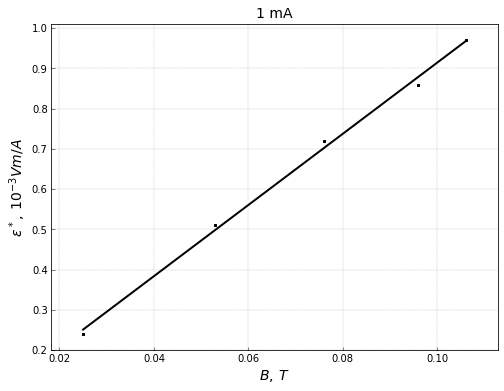

In [10]:
fit, *_ = Plotter(draw_legend=False).set_name("1").set_title("1 mA").set_y_name("$\epsilon^*,\: 10^{-3}V m / A$").set_x_name(
        "$B,\: T$"). \
        add_line(Plotter.get_new_line(y_value=epsilon[::] * 10 ** 3, x_value=tab2.B[::],
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [11]:
R = Value(values=[fit.a], syst=fit.sigma_a) / 1000
print(R)

0.0088 ± 0.0003


In [12]:
tab3 = pd.read_csv("tables/3.tab", sep='\t')
tab3 = pd.merge(tab3, IB, on="I")
tab3.I = tab3.I.apply(Value) + Value(values=[0.0], syst=0.1)
tab3.B = tab3.B.apply(Value) + Value(values=[0.0], syst=0.001)
tab3.U1 = (tab3.U1.apply(Value) + Value(values=[0.0], syst=0.1)) / 1000
tab3.U2 = (tab3.U2.apply(Value) + Value(values=[0.0], syst=0.1)) / 1000
tab3

,I,U1,U2,B
0,0.10 ± 0.10,0.00400 ± 0.00010,0.00290 ± 0.00010,0.0250 ± 0.0010
1,0.20 ± 0.10,0.00750 ± 0.00010,0.00660 ± 0.00010,0.0530 ± 0.0010
2,0.30 ± 0.10,0.01020 ± 0.00010,0.01130 ± 0.00010,0.0760 ± 0.0010
3,0.40 ± 0.10,0.01350 ± 0.00010,0.01270 ± 0.00010,0.0960 ± 0.0010
4,0.50 ± 0.10,0.01490 ± 0.00010,0.01400 ± 0.00010,0.1060 ± 0.0010


In [13]:
epsilon_ = (tab3.U1 + tab3.U2) / 2
epsilon = epsilon_ * d / 0.003

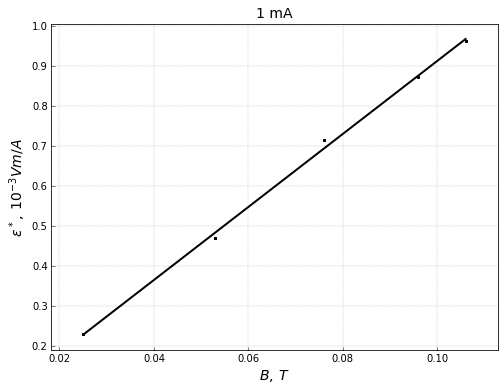

In [14]:
fit, *_ = Plotter(draw_legend=False).set_name("2").set_title("1 mA").set_y_name("$\epsilon^*,\: 10^{-3}V m / A$").set_x_name(
        "$B,\: T$"). \
        add_line(Plotter.get_new_line(y_value=epsilon[::] * 10 ** 3, x_value=tab3.B[::],
                                      draw_error=False, legend='$f_1 = 300Hz$', fit=True, color='black', marker="s")). \
        plot(show=True, save=True)

In [15]:
R2 = Value(values=[fit.a], syst=fit.sigma_a) / 1000
print(R2)

0.0091 ± 0.0002


Нашли $R$

Ура, сходится!

In [16]:
n = 7.4 * 10 ** 18 / R
print(n)

8.4e+20 ± 3e+19


нашли $n$

In [17]:
mu = 0.85 * R / rho
print(mu)

0.21 ± 0.02


нашли $\mu$

In [18]:
with open("tables_result/1.csv", "w") as file:
    file.write(tab1.to_csv())
with open("tables_result/2.csv", "w") as file:
    file.write(tab2.to_csv())
with open("tables_result/3.csv", "w") as file:
    file.write(tab3.to_csv())